In [483]:
import pickle
import configs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import *
from matplotlib import colors
from matplotlib.colors import ListedColormap


In [484]:
#df = pd.read_pickle('trainlogs/log_alloc_train_' + str(configs.n_jobs) + '_' + str(configs.n_machines) + '_' + str(configs.task_time_low) + '_' + str(configs.task_time_high)+'.pkl', 'infer')
df = pd.read_pickle('trainlogs/log_alloc_train_3_9_3_20.pkl', 'infer')

In [491]:
machines,speed, latency = [],[],[]
for x in range(len(df)):
    machines.append(df[x][1])
    speed.append(df[x][2])
    latency.append(df[x][3])
machines = np.array(machines)
speed = np.array(speed)
latency = np.array(latency)
machines.shape


array([[2., 4., 6., ..., 4., 4., 4.],
       [4., 2., 6., ..., 4., 4., 6.],
       [6., 6., 6., ..., 4., 2., 6.],
       ...,
       [2., 2., 2., ..., 2., 2., 2.],
       [6., 6., 6., ..., 6., 6., 6.],
       [2., 2., 2., ..., 2., 2., 2.]])

In [494]:
speed[:10,]


array([[ 2.,  4.,  6.,  4.,  2.,  6.,  4.,  4.,  4.],
       [ 4.,  2.,  6.,  6.,  2.,  2.,  4.,  4.,  6.],
       [ 6.,  6.,  6.,  4.,  6.,  6.,  4.,  2.,  6.],
       [ 2.,  4.,  4.,  4.,  2.,  6.,  6.,  6.,  4.],
       [ 4.,  4.,  6.,  6.,  4.,  2.,  2.,  2.,  2.],
       [ 2.,  2.,  2., 10.,  6.,  2.,  2.,  2.,  2.],
       [ 2.,  4.,  4.,  4.,  6.,  4.,  6.,  6.,  4.],
       [ 4.,  4., 10., 10.,  2.,  4., 10.,  6.,  2.],
       [ 2.,  4.,  6.,  2.,  6.,  4.,  4.,  2.,  2.],
       [ 4.,  4.,  2.,  4., 10.,  4.,  2.,  4.,  6.]])

In [495]:
speed_ticks=[2,4,6]
my_dict = {2:1, 4:2, 6:3, 10:4}
spd = np.vectorize(my_dict.get)(speed)
spd

array([[1, 2, 3, ..., 2, 2, 2],
       [2, 1, 3, ..., 2, 2, 3],
       [3, 3, 3, ..., 2, 1, 3],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [3, 3, 3, ..., 3, 3, 3],
       [1, 1, 1, ..., 1, 1, 1]])

4
[2, 4, 6]


/var/folders/6j/7gfvt_29797dypw8t1wttblw0000gn/T/ipykernel_17852/1306418773.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


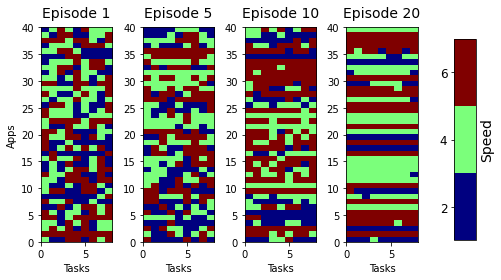

In [499]:

size = 40
nplots = len(spd)//size
print(nplots)
speed_ticks=[2,4,6]
print(speed_ticks)
n_latencies = len(speed_ticks)

# colors = ["#2b2d42", "#073b4c", "#118ab2","#06d6a0", "#ffd166", "#ef476f"] 
# c = ListedColormap(colors)
c = plt.get_cmap('jet',3)
bounds =  np.arange(0,n_latencies,1)

fig, axi = plt.subplots(1, nplots)
episode = [1,5,10,20]
for e,n in enumerate(range(nplots)):
    im2 = axi[e].imshow(spd[e*size:(n*size)+size], extent=[0,8,0,40], aspect="auto", cmap=c)
    # axi[e].set_xticklabels([])
    # axi[e].set_xticks([0,5,8], [0,5,9])
    if e == 0: axi[e].set_ylabel("Apps")
    axi[e].set_xlabel('Tasks')
    axi[e].set_title('Episode %i'%episode[e],fontsize=14,pad=10)


cbar_ax = fig.add_axes([1.06, 0.15, 0.05, 0.7])
cb = mpl.colorbar.ColorbarBase(cbar_ax,ticks=bounds,cmap=c)
cb.set_ticks((bounds/n_latencies)+(1/(n_latencies*2)))
cb.set_ticklabels(speed_ticks, fontsize=12)
cb.ax.set_ylabel('Speed',  fontsize=14,)
cb.ax.yaxis.set_ticks_position('left')
fig.tight_layout()
plt.savefig("images/speed_40_9.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'bar3d'

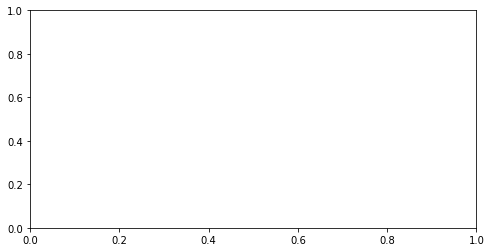

In [498]:
x = np.arange(spd.shape[0])
y = np.arange(spd.shape[1])
_xx, _yy = np.meshgrid(x, y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

fig, ax = plt.subplots(figsize=(8,4))
ax.bar3d(x, y, bottom, width, depth, top, shade=True)
plt.show()

In [474]:

latency_ticks=[1,5,10,15,20,30]
my_dict = {1:1, 5:2, 10:3, 15:4, 20:5,30:6}
lat = np.vectorize(my_dict.get)(latency)
lat
   

array([[5, 2, 2, ..., 2, 5, 5],
       [1, 2, 5, ..., 3, 5, 5],
       [2, 3, 2, ..., 5, 4, 6],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

In [475]:
lat.shape

(160, 9)

4
[1, 5, 10, 15, 20, 25]


/var/folders/6j/7gfvt_29797dypw8t1wttblw0000gn/T/ipykernel_17852/4197980563.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


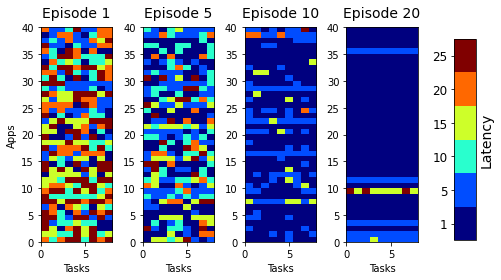

In [479]:

size = 40
nplots = len(lat)//size
print(nplots)
latency_ticks= [1,5,10,15,20,25]
print(latency_ticks)
n_latencies = len(latency_ticks)

# colors = ["#2b2d42", "#073b4c", "#118ab2","#06d6a0", "#ffd166", "#ef476f"] 
# c = ListedColormap(colors)
c = plt.get_cmap('jet',6)
bounds =  np.arange(0,n_latencies,1)

fig, axi = plt.subplots(1, nplots)
episode = [1,5,10,20]
for e,n in enumerate(range(nplots)):
    im2 = axi[e].imshow(lat[e*size:(n*size)+size], extent=[0,8,0,40], aspect="auto", cmap=c)
    # axi[e].set_xticklabels([])
    # axi[e].set_xticks([0,5,8], [0,5,9])
    if e == 0: axi[e].set_ylabel("Apps")
    axi[e].set_xlabel('Tasks')
    axi[e].set_title('Episode %i'%episode[e],fontsize=14,pad=10)


cbar_ax = fig.add_axes([1.06, 0.15, 0.05, 0.7])
cb = mpl.colorbar.ColorbarBase(cbar_ax,ticks=bounds,cmap=c)
cb.set_ticks((bounds/n_latencies)+(1/(n_latencies*2)))
cb.set_ticklabels(latency_ticks, fontsize=12)
cb.ax.set_ylabel('Latency',  fontsize=14,)
cb.ax.yaxis.set_ticks_position('left')
fig.tight_layout()
plt.savefig("images/latency_40_9.pdf",dpi=300,bbox_inches = 'tight')
plt.show()


In [480]:
df = pd.read_pickle('trainlogs/log_alloc_c15_v2_train_9_99_3_20.pkl', 'infer')
machines,speed, latency = [],[],[]
for x in range(len(df)):
    machines.append(df[x][1])
    speed.append(df[x][2])
    latency.append(df[x][3])
machines = np.array(machines)
speed = np.array(speed)
latency = np.array(latency)
machines.shape

latency_options = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70]
my_dict = {1:1, 5:2, 10:3, 15:4, 20:5,25:6,30:6,35:7,40:8,45:9,50:10,55:11,60:11,65:12,70:13}
lat = np.vectorize(my_dict.get)(latency)
lat


array([[ 9,  9, 10, ..., 10,  4, 12],
       [ 4,  8,  3, ...,  6, 11, 13],
       [ 9,  3,  4, ...,  6,  4, 11],
       ...,
       [ 1,  1,  3, ...,  2,  2,  2],
       [ 3,  1,  1, ...,  1,  1,  1],
       [ 2,  1,  1, ...,  1,  2,  2]])

In [481]:
lat.shape

(160, 81)

4
[1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
0 40
40 80
80 120
120 160


/var/folders/6j/7gfvt_29797dypw8t1wttblw0000gn/T/ipykernel_17852/2911610927.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


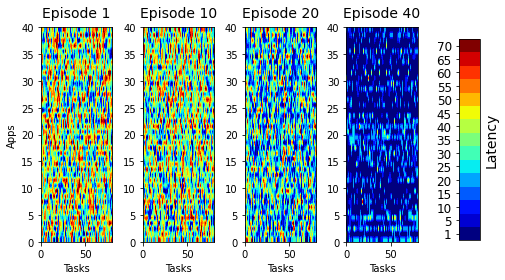

In [482]:

size = 40
nplots = len(lat)//size
print(nplots)
latency_ticks= [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70]
print(latency_ticks)
n_latencies = len(latency_ticks)

# colors = ["#2b2d42", "#073b4c", "#118ab2","#06d6a0", "#ffd166", "#ef476f"] 
# c = ListedColormap(colors)
c = plt.get_cmap('jet',n_latencies)
bounds =  np.arange(0,n_latencies,1)

fig, axi = plt.subplots(1, nplots)
episode = [1,10,20,40]
for e,n in enumerate(range(nplots)):
    print(e*size,(n*size)+size)
    im2 = axi[e].imshow(lat[e*size:(n*size)+size], extent=[0,80,0,40], aspect="auto",cmap=c)
    # axi[e].set_xticklabels([])
    # axi[e].set_xticks([0,5,8], [0,5,9])
    if e == 0: axi[e].set_ylabel("Apps")
    axi[e].set_xlabel('Tasks')
    axi[e].set_title('Episode %i'%episode[e],fontsize=14,pad=10)


cbar_ax = fig.add_axes([1.07, 0.15, 0.05, 0.7])
cb = mpl.colorbar.ColorbarBase(cbar_ax,ticks=bounds,cmap=c)
cb.set_ticks((bounds/n_latencies)+(1/(n_latencies*2)))
cb.set_ticklabels(latency_ticks, fontsize=12)
cb.ax.set_ylabel('Latency',  fontsize=14,)
cb.ax.yaxis.set_ticks_position('left')
fig.tight_layout()
plt.savefig("images/latency_c15_99.pdf",dpi=300,bbox_inches = 'tight')

plt.show()


In [392]:
train_log = pd.read_pickle('trainlogs/log_ppo_train_' + str(configs.n_jobs) + '_' + str(configs.n_machines) + '_' + str(configs.task_time_low) + '_' + str(configs.task_time_high)+'.pkl', 'infer')
edge_log = pd.read_pickle('trainlogs/log_edge_train_' + str(configs.n_jobs) + '_' + str(configs.n_machines) + '_' + str(configs.task_time_low) + '_' + str(configs.task_time_high)+'.pkl', 'infer')
rnd_log = pd.read_pickle('trainlogs/log_rnd_train_' + str(configs.n_jobs) + '_' + str(configs.n_machines) + '_' + str(configs.task_time_low) + '_' + str(configs.task_time_high)+'.pkl', 'infer')
train_log = np.array(train_log)
edge_log = np.array(edge_log)
rnd_log = np.array(rnd_log)
print(train_log.shape)
train_log = np.abs(train_log)
rnd_log = np.abs(rnd_log)
edge_log = np.abs(edge_log)

print(train_log[:5])

(100, 4)
[[  0.         178.9037487   35.51129913  88.32000008]
 [  1.         168.30666656  31.57043457  79.42000055]
 [  2.         176.3354167   26.34950829  81.80500021]
 [  3.         143.5812499   25.81871796  81.31249952]
 [  4.         128.80750008  25.95491028  83.82499981]]


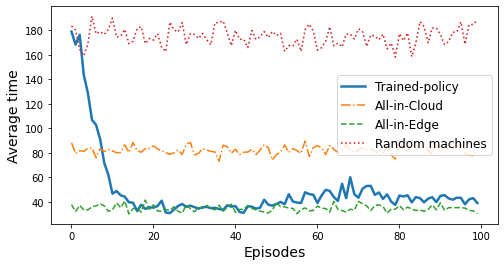

In [404]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(train_log[:,1],linewidth=2.5,label="Trained-policy")
ax.plot(train_log[:,-1],linestyle="-.",label="All-in-Cloud")
ax.plot(edge_log[:,1],linewidth=1.5,linestyle="dashed",label="All-in-Edge")
ax.plot(rnd_log[:,1],linewidth=1.6,linestyle=":",label="Random machines")
# plt.legend(title='Allocations',fontsize=14)
plt.legend(fontsize=12)
# plt.title('Job times',fontsize=16)
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Average time', fontsize=14)
plt.savefig("images/rewardstime_40_9.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [405]:
train_log99 = pd.read_pickle('trainlogs/log_ppo_train_3_99_3_20.pkl', 'infer')
train_log999 = pd.read_pickle('trainlogs/log_ppo_train_3_999_3_20.pkl', 'infer')
train_log99 = np.array(train_log99)
train_log999 = np.array(train_log999)
train_log999 = np.abs(train_log999)
train_log99 = np.abs(train_log99)


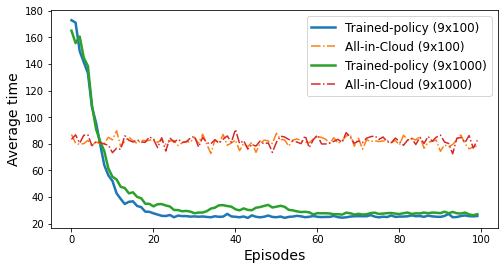

In [407]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(train_log99[:,1],linewidth=2.5,label="Trained-policy (9x100)")
ax.plot(train_log99[:,-1],linestyle="-.",label="All-in-Cloud (9x100)")

ax.plot(train_log999[:,1],linewidth=2.5,label="Trained-policy (9x1000)")
ax.plot(train_log999[:,-1],linestyle="-.",label="All-in-Cloud (9x1000)")


# plt.legend(title='Allocations',fontsize=14)
plt.legend(fontsize=12)
# plt.title('Job times',fontsize=16)
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Average time', fontsize=14)
plt.savefig("images/rewardstime_99-999_9.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [408]:
train_log99 = pd.read_pickle('trainlogs/log_ppo_train_9_99_3_20.pkl', 'infer')
train_log999 = pd.read_pickle('trainlogs/log_ppo_train_9_999_3_20.pkl', 'infer')
train_log99 = np.array(train_log99)
train_log999 = np.array(train_log999)
train_log999 = np.abs(train_log999)
train_log99 = np.abs(train_log99)

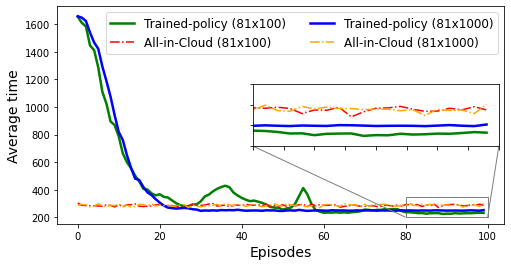

In [431]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
fig, ax = plt.subplots(figsize=(8,4))

axins1 = zoomed_inset_axes(ax, zoom = 3, loc='center right')
axins1.plot(train_log99[:,1],color='green',linewidth=2.5)
axins1.plot(train_log999[:,1],color='blue',linewidth=2.5)
axins1.plot(train_log99[:,-1],color='red',linestyle="-.")
axins1.plot(train_log999[:,-1],color='orange',linestyle="-.")
axins1.tick_params(labelleft=False, labelbottom=False)
#axins1.plot(y,datapts.T,'mo')
x1, x2, y1, y2 = 80,100,200,350 
axins1.set_xlim(x1, x2)
axins1.set_ylim(y1, y2)

ax.plot(train_log99[:,1],linewidth=2.5,label="Trained-policy (81x100)",color='green')
ax.plot(train_log99[:,-1],linestyle="-.",label="All-in-Cloud (81x100)",color='red')

ax.plot(train_log999[:,1],linewidth=2.5,label="Trained-policy (81x1000)",color='blue')
ax.plot(train_log999[:,-1],linestyle="-.",label="All-in-Cloud (81x1000)",color='orange')

mark_inset(ax, axins1, loc1=3, loc2=4, fc="none", ec="0.5")
# plt.legend(title='Allocations',fontsize=14)
ax.legend(fontsize=12,ncol=2)
# plt.title('Job times',fontsize=16)
ax.set_xlabel('Episodes', fontsize=14)
ax.set_ylabel('Average time', fontsize=14)
plt.savefig("images/rewardstime_99-999_81.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

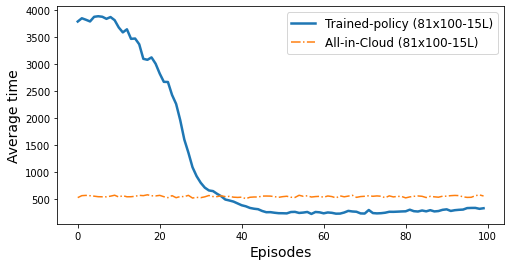

In [445]:
train_log15 = pd.read_pickle('trainlogs/log_ppo_c15_train_9_99_3_20.pkl', 'infer')
train_log15 = np.array(train_log15)
train_log15 = np.abs(train_log15)
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(train_log15[:,1],linewidth=2.5,label="Trained-policy (81x100-15L)")
ax.plot(train_log15[:,-1],linestyle="-.",label="All-in-Cloud (81x100-15L)")


# plt.legend(title='Allocations',fontsize=14)
plt.legend(fontsize=12)
# plt.title('Job times',fontsize=16)
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Average time', fontsize=14)
plt.savefig("images/rewardstime_81_100_L15.pdf",dpi=300,bbox_inches = 'tight')
plt.show()